# Programming for Data Analysis Project 2019

For this project a simulated data set was created by simulating a real-world phenomenon of my choosing, in my case it was craeted using 2015 world cup data. Then, rather than collect data related to the this phenomenon, I modeled and synthesise such data using Python and numpy.random.

The criteria were as follows:

1. Choose a real-world phenomenon that can be measured and for which you couldcollect at least one-hundred data points across at least four different variables.
2. Investigate the types of variables involved, their likely distributions, and their relationships with each other.
3. Synthesise/simulate a data set as closely matching their properties as possible.
4. Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.


In [1]:
# Import of packages
import pandas as pd
impora seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Use of 2015 Rugby World Cup Data

In [2]:
# got unicode error so used 'latin-1' to read file

df = pd.read_csv("http://teaching.statistics-is-awesome.org/wp-content/uploads/2015/11/rubgy_world_cup_20151.csv", encoding='latin-1')

In [3]:
# drop null values to clean data
df.dropna(inplace = True)  

In [4]:
df

,team,name,caps,position,years_since_debut,debut,age,approx_age_debuted,height_cm,weight_kg
0,Australia,Stephen Moore,102.0,Hooker,10.5,11-Jun-05,32,22,186,112
1,Japan,Male Sau,26.0,Centre,2.6,20-Apr-13,28,25,183,97
2,South Africa,Pieter-Steph Du Toit,8.0,Lock,2.0,9-Nov-13,23,21,200,115
3,Japan,Harumichi Tatekawa,43.0,Centre,3.6,28-Apr-12,25,21,181,94
4,New Zealand,Beauden Barrett,36.0,Fly Half,3.4,23-Jun-12,24,21,187,91
5,Argentina,Martín Landajo,52.0,Scrum Half,5.5,21-May-10,27,22,171,81
6,New Zealand,Ben Smith,48.0,Wing,6.0,14-Nov-09,29,23,186,94
7,Scotland,David Denton,32.0,Back Row,4.3,6-Aug-11,25,21,196,114
8,Samoa,Wayne Ole Avei,24.0,Hooker,4.4,2-Jul-11,32,28,178,114
9,Japan,Hitoshi Ono,96.0,Lock,11.5,16-May-04,37,26,192,106


In [5]:
df.shape

(643, 10)

In [6]:
df.isnull().sum()

team                  0
name                  0
caps                  0
position              0
years_since_debut     0
debut                 0
age                   0
approx_age_debuted    0
height_cm             0
weight_kg             0
dtype: int64

In [7]:
df.dtypes

team                   object
name                   object
caps                  float64
position               object
years_since_debut     float64
debut                  object
age                     int64
approx_age_debuted      int64
height_cm               int64
weight_kg               int64
dtype: object

In [8]:
df.describe()

,caps,years_since_debut,age,approx_age_debuted,height_cm,weight_kg
count,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000
mean,32.416796,5.051477,27.732504,22.864697,186.124417,102.937792
std,25.046322,3.618154,3.741239,2.759641,7.223409,12.840594
min,1.000000,0.100000,19.000000,18.000000,165.000000,65.000000
25%,14.000000,2.000000,25.000000,21.000000,181.000000,93.000000
50%,26.000000,4.300000,28.000000,22.000000,186.000000,103.000000
75%,43.000000,7.400000,30.000000,24.000000,191.000000,113.000000
max,148.000000,17.000000,38.000000,34.000000,208.000000,145.000000


In [42]:
# Calculate breakdown of positions

positionbreakdown = df[['position','team']]
positionbreakdown = positionbreakdown.groupby(['position'])['team'].aggregate('count').reset_index().sort_values('position')

total = positionbreakdown['team'].aggregate('sum')

positionbreakdown['% proportion'] =  (positionbreakdown['team'] / total * 100).round()

positionbreakdown

,position,team,% proportion
0,Back Row,121,19.0
1,Centre,72,11.0
2,Fly Half,48,7.0
3,Full Back,33,5.0
4,Hooker,56,9.0
5,Lock,74,12.0
6,Prop,107,17.0
7,Scrum Half,53,8.0
8,Utility Back,3,0.0
9,Utility Forward,2,0.0


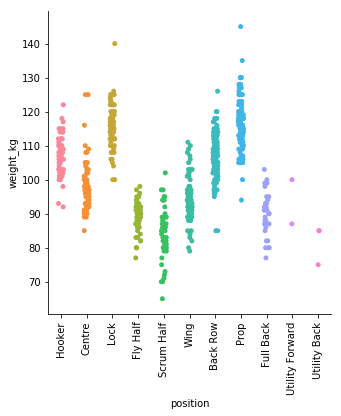

In [10]:
# comparison of weights to position

chart = sns.catplot(x="position", y="weight_kg",data=df)
chart.set_xticklabels(rotation=90)
plt.show('chart')

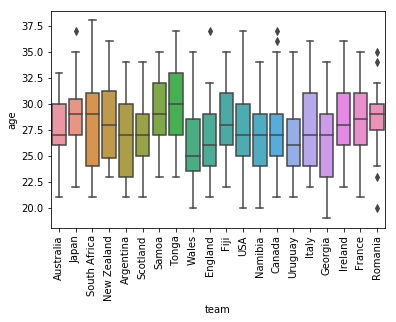

In [11]:
plot = sns.boxplot(x="team", y="age", data=df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()

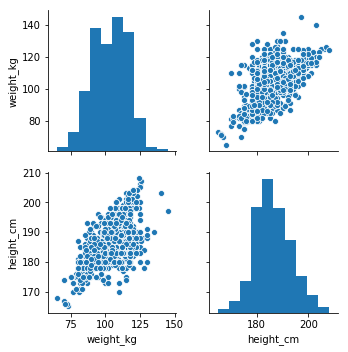

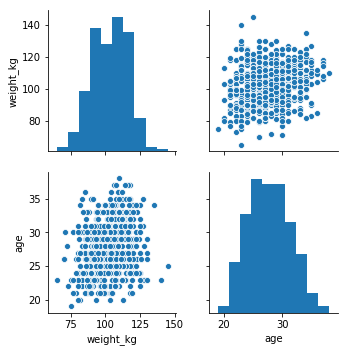

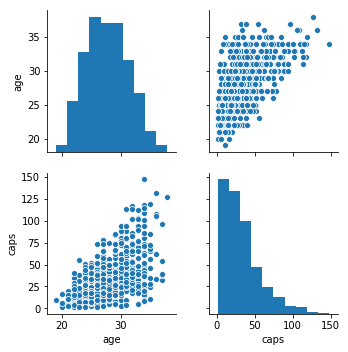

In [12]:
plot_1 = sns.pairplot(df, vars=["weight_kg", "height_cm"])
plt.show('plot_1')

plot_2 = sns.pairplot(df, vars=["weight_kg", "age"])
plt.show('plot_2')

plot_3 = sns.pairplot(df, vars=["age", "caps"])
plt.show('plot_3')


In [13]:
Height = (np.random.uniform(low=165, high=208, size=600)).round(2)
print(Height)

[193.5  179.37 181.44 189.63 203.24 205.24 203.12 166.68 170.02 174.48
 183.25 193.24 204.38 173.99 178.67 171.78 167.01 207.1  165.77 165.82
 185.51 192.45 198.12 192.06 186.53 179.36 195.5  206.03 184.16 166.88
 195.31 182.82 166.85 190.76 194.2  191.13 165.45 171.47 195.71 189.69
 187.97 175.17 184.4  183.6  194.46 206.08 182.72 178.97 203.45 167.15
 199.74 165.12 192.95 169.69 200.31 171.86 173.21 172.85 192.62 168.63
 188.96 168.17 198.22 186.4  179.02 206.42 199.06 207.3  171.01 169.03
 195.43 189.6  166.2  169.61 199.18 171.92 175.87 194.08 204.66 199.85
 180.02 184.85 197.91 201.03 170.67 175.73 194.99 174.03 199.81 166.55
 171.06 191.26 194.04 187.55 202.45 170.01 205.62 175.19 195.6  182.86
 173.63 188.78 188.59 207.05 192.1  190.81 201.83 173.6  182.27 165.32
 183.21 194.51 181.98 183.9  199.52 169.98 199.29 206.04 191.48 169.52
 170.78 178.54 173.55 180.12 185.26 183.98 188.28 180.65 199.44 205.01
 186.86 177.03 207.88 176.16 197.58 188.72 177.23 200.43 194.12 200.15
 184.8

In [14]:
Age = (np.random.randint(low=19, high=38, size=600))
print(Age)

[30 36 26 29 23 28 33 37 30 21 28 27 27 21 21 33 37 26 33 26 37 25 37 24
 23 35 31 30 31 20 32 22 36 28 19 20 33 29 24 21 36 37 24 33 20 36 20 33
 20 25 26 37 20 29 34 23 19 35 22 31 23 25 29 24 24 19 33 32 33 30 28 30
 35 31 22 31 37 22 30 33 37 31 21 35 21 33 27 21 26 19 31 33 32 32 22 25
 31 27 23 35 21 28 32 21 31 22 21 36 25 20 24 23 33 19 25 22 20 22 31 31
 32 19 27 19 22 21 37 26 29 23 27 37 30 30 29 37 25 31 25 35 24 27 22 36
 33 23 33 36 36 21 36 21 26 31 35 21 25 35 35 32 19 32 28 20 21 32 19 24
 30 29 25 25 35 28 20 34 30 32 30 26 30 37 37 30 36 36 26 32 30 30 19 25
 21 26 21 31 29 35 27 33 34 36 29 32 31 22 21 35 23 33 34 24 29 23 34 22
 36 31 24 36 31 32 25 24 22 21 30 26 21 24 19 19 27 31 31 23 23 36 24 27
 26 26 29 21 29 31 20 25 28 24 30 37 34 28 27 29 32 28 22 31 22 25 29 36
 29 32 37 32 21 28 22 30 22 32 20 30 29 23 21 32 22 29 35 33 31 36 24 37
 35 19 22 26 36 36 25 33 22 28 29 36 26 19 29 27 21 28 34 35 29 32 34 26
 34 24 27 22 22 37 22 23 31 37 23 29 27 36 20 37 20

In [15]:
Caps = (np.random.randint(low=1, high=148, size=600))
print(Caps)

[ 20   5 111 141   2  34  64  65 110  97  12  89  65 100  91  69 146  47
 145  82  13   6  90 107  71  60  29   9 110  95  88  49 112  33 110 112
  36  56 125  18  65 129  93 116 123 125  90 125 103  74  17 123  96  63
  85   9 116  53 125  38  84 107  90  92  16  13  99  14  26  83  76  96
 106 121 131   6   2 102   5 126 138 119 142  84  62  30 114  55  71  43
  44  84  72 124  61  30 143  17 126  48 116  10   1 130 134  68 125 128
  75  18 134  93  77  88 112  97  16 107  66  51  57 135  85  22 101  78
   6  77 112  91 105  92 113  96 123 140  83  27 117 114  46  26 111  35
  79  77 140  79 137  85  38   8  23  39  27  84  20  73  46  44  74  40
 136  88 112  95 114 112  61  44  28  24 104  26  75  96 102  68   2  19
  64  58  31 136  36  56 106  96 117 100  85  89   2  41  46  75  91 112
 135  65  13  35 144  76  55  77 114  98  95  29 142  23 105  49   4  24
 142 119  91 129 134 144  61  58  32  94  71 131  15 140  67 142  21 139
  92  56 114 103  93 127  47 112  61 111  78  88 11

In [16]:
Weight = (np.random.uniform(low=65, high=145, size=600)).round(2)
print(Height)

[193.5  179.37 181.44 189.63 203.24 205.24 203.12 166.68 170.02 174.48
 183.25 193.24 204.38 173.99 178.67 171.78 167.01 207.1  165.77 165.82
 185.51 192.45 198.12 192.06 186.53 179.36 195.5  206.03 184.16 166.88
 195.31 182.82 166.85 190.76 194.2  191.13 165.45 171.47 195.71 189.69
 187.97 175.17 184.4  183.6  194.46 206.08 182.72 178.97 203.45 167.15
 199.74 165.12 192.95 169.69 200.31 171.86 173.21 172.85 192.62 168.63
 188.96 168.17 198.22 186.4  179.02 206.42 199.06 207.3  171.01 169.03
 195.43 189.6  166.2  169.61 199.18 171.92 175.87 194.08 204.66 199.85
 180.02 184.85 197.91 201.03 170.67 175.73 194.99 174.03 199.81 166.55
 171.06 191.26 194.04 187.55 202.45 170.01 205.62 175.19 195.6  182.86
 173.63 188.78 188.59 207.05 192.1  190.81 201.83 173.6  182.27 165.32
 183.21 194.51 181.98 183.9  199.52 169.98 199.29 206.04 191.48 169.52
 170.78 178.54 173.55 180.12 185.26 183.98 188.28 180.65 199.44 205.01
 186.86 177.03 207.88 176.16 197.58 188.72 177.23 200.43 194.12 200.15
 184.8

In [43]:
# Set Array
Position = ['Back Row','Centre', 'Fly Half','Full Back','Hooker','Lock','Prop','Scrum Half','Wing']

# Build Dataframe 
pos = np.random.choice(Position, 600, p=[0.19, 0.11,0.07,0.05,0.09,0.12,0.17,0.08,0.12])

print(pos)


['Back Row' 'Back Row' 'Lock' 'Full Back' 'Hooker' 'Wing' 'Prop' 'Prop'
 'Centre' 'Fly Half' 'Lock' 'Fly Half' 'Fly Half' 'Back Row' 'Scrum Half'
 'Hooker' 'Scrum Half' 'Prop' 'Wing' 'Scrum Half' 'Full Back' 'Hooker'
 'Wing' 'Back Row' 'Scrum Half' 'Prop' 'Lock' 'Wing' 'Back Row' 'Lock'
 'Lock' 'Prop' 'Fly Half' 'Full Back' 'Back Row' 'Centre' 'Centre'
 'Fly Half' 'Prop' 'Back Row' 'Back Row' 'Back Row' 'Prop' 'Lock' 'Wing'
 'Centre' 'Fly Half' 'Wing' 'Centre' 'Prop' 'Hooker' 'Back Row'
 'Scrum Half' 'Scrum Half' 'Hooker' 'Back Row' 'Scrum Half' 'Lock'
 'Hooker' 'Lock' 'Full Back' 'Prop' 'Wing' 'Prop' 'Wing' 'Back Row' 'Wing'
 'Hooker' 'Lock' 'Back Row' 'Lock' 'Wing' 'Prop' 'Prop' 'Prop' 'Back Row'
 'Back Row' 'Back Row' 'Lock' 'Lock' 'Lock' 'Centre' 'Back Row'
 'Scrum Half' 'Back Row' 'Hooker' 'Lock' 'Prop' 'Scrum Half' 'Lock'
 'Back Row' 'Back Row' 'Centre' 'Scrum Half' 'Centre' 'Back Row' 'Centre'
 'Scrum Half' 'Scrum Half' 'Centre' 'Prop' 'Wing' 'Back Row' 'Lock' 'Prop'
 'Hooker' '

In [56]:
Simtable = pd.DataFrame({'Height' : Height, 'Age' : Age, 'Weight' : Weight, 'Caps' : Caps, 'Position' : pos})
print(table)

     Height  Age  Weight  Caps    Position
0    193.50   30   87.10    20    Back Row
1    179.37   36  104.64     5    Back Row
2    181.44   26  128.85   111        Lock
3    189.63   29  104.05   141   Full Back
4    203.24   23   83.26     2      Hooker
5    205.24   28  127.27    34        Wing
6    203.12   33  126.26    64        Prop
7    166.68   37  108.02    65        Prop
8    170.02   30   84.15   110      Centre
9    174.48   21   68.47    97    Fly Half
10   183.25   28   89.31    12        Lock
11   193.24   27  124.71    89    Fly Half
12   204.38   27  121.45    65    Fly Half
13   173.99   21  138.94   100    Back Row
14   178.67   21  135.95    91  Scrum Half
15   171.78   33  106.99    69      Hooker
16   167.01   37  102.66   146  Scrum Half
17   207.10   26   67.11    47        Prop
18   165.77   33   66.37   145        Wing
19   165.82   26  106.60    82  Scrum Half
20   185.51   37  105.38    13   Full Back
21   192.45   25   84.00     6      Hooker
22   198.12

In [57]:
Simtable.describe()

,Height,Age,Weight,Caps
count,600.000000,600.000000,600.000000,600.000000
mean,186.368783,27.963333,105.039950,73.220000
std,12.452282,5.488369,23.309716,41.766242
min,165.120000,19.000000,65.040000,1.000000
25%,175.297500,23.000000,84.717500,38.000000
50%,187.065000,28.000000,104.135000,74.000000
75%,196.820000,32.000000,125.710000,110.000000
max,207.970000,37.000000,144.740000,147.000000


In [54]:
df.describe()

,caps,years_since_debut,age,approx_age_debuted,height_cm,weight_kg
count,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000
mean,32.416796,5.051477,27.732504,22.864697,186.124417,102.937792
std,25.046322,3.618154,3.741239,2.759641,7.223409,12.840594
min,1.000000,0.100000,19.000000,18.000000,165.000000,65.000000
25%,14.000000,2.000000,25.000000,21.000000,181.000000,93.000000
50%,26.000000,4.300000,28.000000,22.000000,186.000000,103.000000
75%,43.000000,7.400000,30.000000,24.000000,191.000000,113.000000
max,148.000000,17.000000,38.000000,34.000000,208.000000,145.000000


# References

1. https://teaching.statistics-is-awesome.org/rugby-world-cup-2015-players-data/